# Bank data analysis

The goal of your project is to create a robust classifier and use the data, where you will build a model that will recognize whether specific client will leave/unsubscribe the bank services.
Make feature engineering but also try differnet models in order to get as much accuracy as possible.




    

## Dataset Info

* CLIENTNUM
  - Client number. Unique identifier for the customer holding the account

* Attrition_Flag
  - Internal event (customer activity) variable - if the account is closed then 1 else 0

* Customer_Age
  - Demographic variable - Customer's Age in Years

* Gender
  - Demographic variable - M=Male, F=Female

* Dependent_count
  - Demographic variable - Number of dependents

* Education_Level
  - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)


* Marital_Status
  - Demographic variable - Married, Single, Divorced, Unknown

* Income_Category
  - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)


* Card_Category
  - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

* Months_on_book
  - Period of relationship with bank


* Total_Relationship_Count
  - Total no. of products held by the customer

* Months_Inactive_12_mon
  - No. of months inactive in the last 12 months

* Contacts_Count_12_mon
  - No. of Contacts in the last 12 months

* Credit_Limit
  - Credit Limit on the Credit Card

* Total_Revolving_Bal
  - Total Revolving Balance on the Credit Card

* Avg_Open_To_Buy
  - Open to Buy Credit Line (Average of last 12 months)

* Total_Amt_Chng_Q4_Q1
  - Change in Transaction Amount (Q4 over Q1)

* Total_Trans_Amt
  - Total Transaction Amount (Last 12 months)

* Total_Trans_Ct
  - Total Transaction Count (Last 12 months)

* Total_Ct_Chng_Q4_Q1
  - Change in Transaction Count (Q4 over Q1)

* Avg_Utilization_Ratio
  - Average Card Utilization Ratio




# Working Plan



1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

## 0. Read data, visualize, basic statistics, understand it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
dataset = pd.read_csv('dataset_bank.csv')

In [3]:
dataset.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36.0,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46.0,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27.0,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36.0,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36.0,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [4]:
#dataset.describe()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null float64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null i

In [6]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


print("Numeric columns")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        print(column)
print("----------------------------------")        
print("Category columns")        
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        print(column)

Numeric columns
CLIENTNUM
Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
----------------------------------
Category columns
Attrition_Flag
Gender
Education_Level
Marital_Status
Income_Category
Card_Category


## EDA - Univariate Analysis of Categorical Variables (imbalance detection)

In [7]:
dataset['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

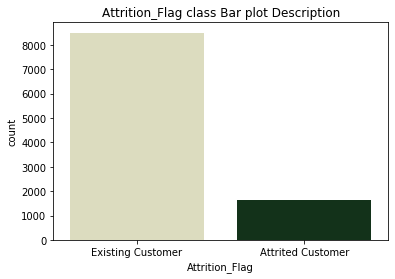

In [8]:
plt.title("Attrition_Flag class Bar plot Description")
plt.xlabel("Attrition_Flag information")
plt.ylabel("Attrition_Flag class proportion")
sns.countplot(dataset['Attrition_Flag'], saturation=1, palette="ch:s=8.12,rot=-0.25")

The graph shows that this is an unbalanced problem.

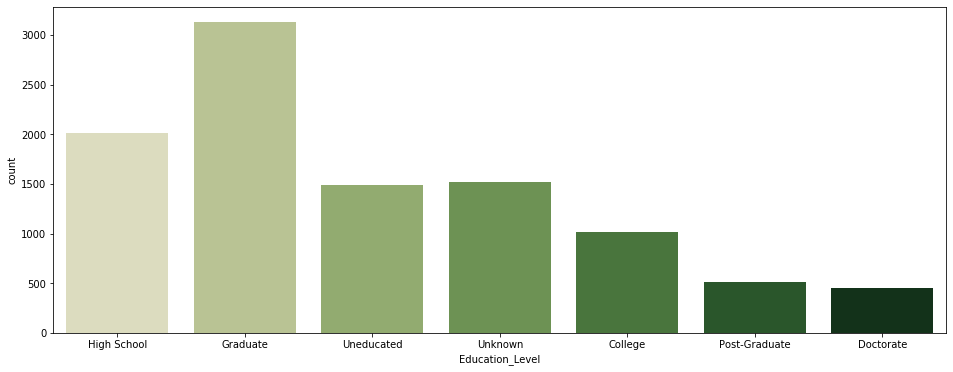

In [9]:
plt.figure(figsize=(16, 6))
sns.countplot(dataset['Education_Level'], saturation=1, palette="ch:s=8.12,rot=-0.25")

The graph above is important to have a better understanding of the card owners regarding the level of education of customers. Therefore customers with education level Graduate are the most represented, the second ones are the customers with education level High School, while other education levels are less represented.

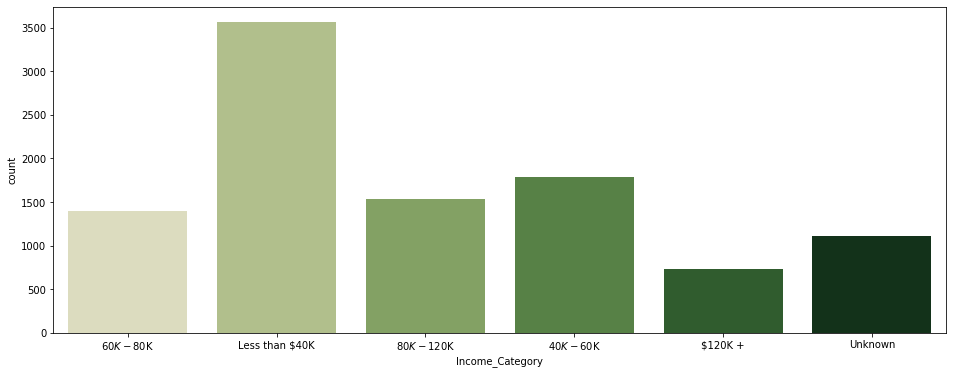

In [10]:
plt.figure(figsize=(16, 6))
sns.countplot(dataset['Income_Category'], saturation=1, palette="ch:s=8.12,rot=-0.25")

Most of the Bank's customers have less than 40.000 usd income. The other income categories are realtively equal, except for the group with highest income level. The wealthiest clients (with more than 120.000 usd) are the smallest group of clients in the dataset.

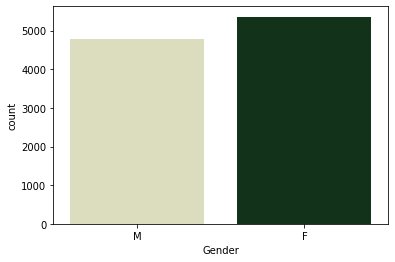

In [11]:
sns.countplot(dataset['Gender'], saturation=1, palette="ch:s=8.12,rot=-0.25")

The graph above shows total customers by gender. This feature shows very small influence on the card ownership.

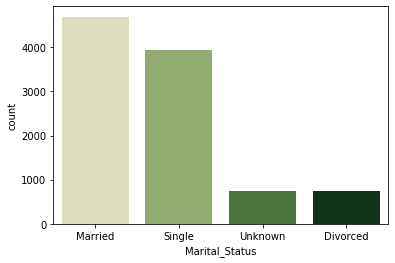

In [12]:
sns.countplot(dataset['Marital_Status'], saturation=1, palette="ch:s=8.12,rot=-0.25")

The graph above shows total customers by their marital status. It could be concluded that the clients with marital status "Married" and "Single" have greater interest in having credit cards than the ones that are "Divorced" and, for some reason, of an "Unknown" marital status.

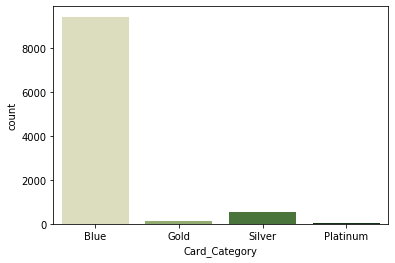

In [13]:
sns.countplot(dataset['Card_Category'], saturation=1, palette="ch:s=8.12,rot=-0.25")

Most of the customers have blue card category, while all other card categories are less represented. This is of a great importance showing the dominant ownership of the Blue card agains all of the other types of cards (Gold, Silver and Platinum).

## EDA - Univariate Analysis of Numerical Variables (imbalance detection)

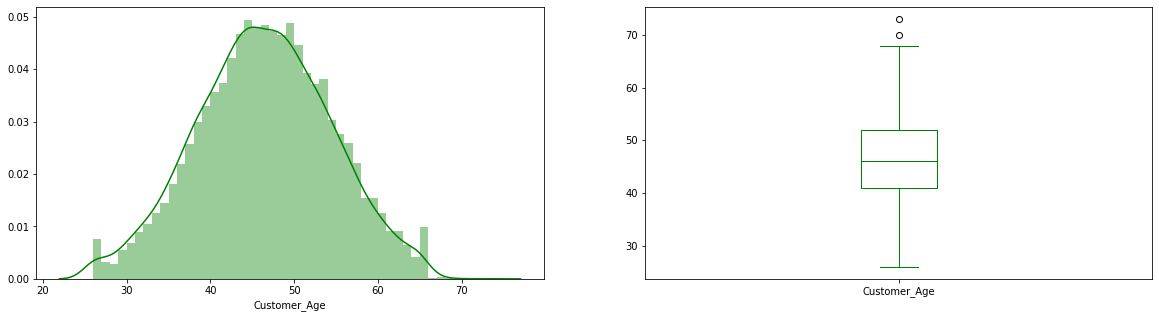

In [14]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Customer_Age'], label='Customer_Age', color="g" )



plt.subplot(122)
dataset['Customer_Age'].plot(kind='box', label="Customer_Age", color="g")


The graph above shows normal distribution for the age variable where most of the customers are between 40 and 55 years old.

In [15]:
dataset['Customer_Age'].value_counts()

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
60    127
33    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
73      1
70      1
Name: Customer_Age, dtype: int64

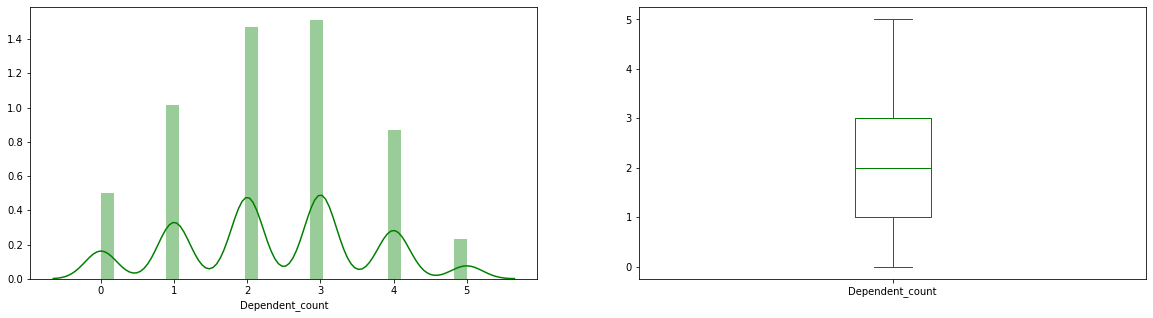

In [16]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Dependent_count'], label='Dependent_count', color="g")

plt.subplot(122)
dataset['Dependent_count'].plot(kind='box', label="Dependent_count", color="g")

This feature presents the number of subject that are connected with the credit card owner. Most of them have 2 and 3 dependents, which are the closest family circle. An important mention is that this feature DOES NOT correspond with the feature 'Marital_Status'. They are independent of one another.

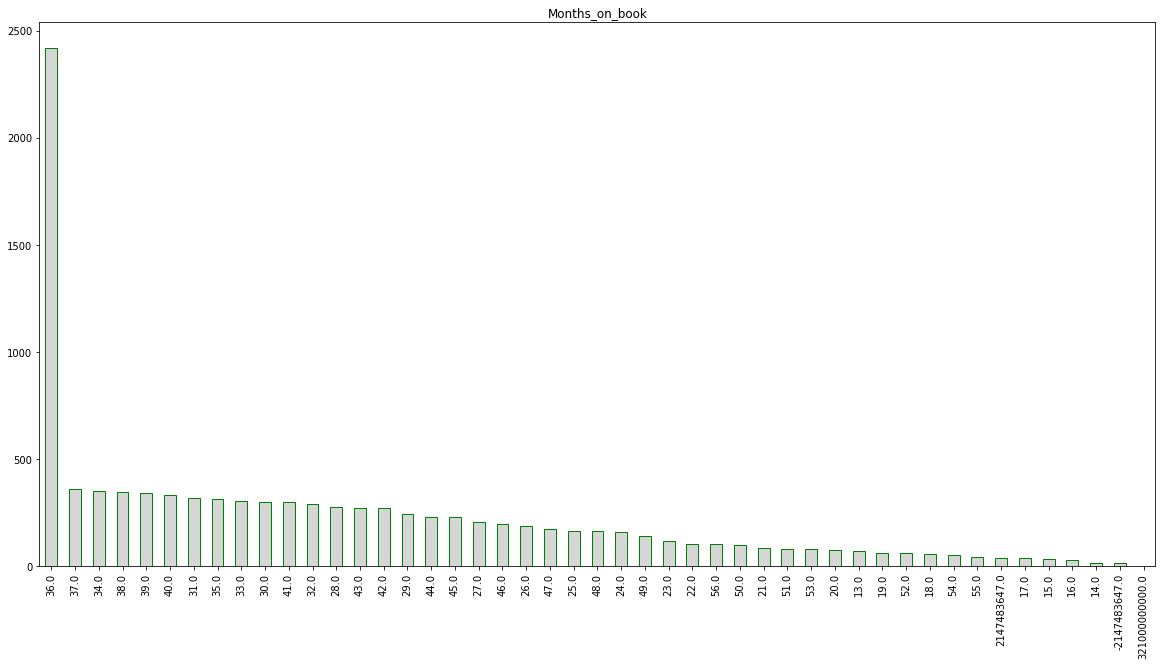

In [17]:
dataset['Months_on_book'].value_counts().plot.bar(figsize=(20,10),title='Months_on_book', color=(0.2, 0.2, 0.2, 0.2),  edgecolor='green')

This feature is important because it indirectly implies to the customer loyalty. This is very necessary for the bank because every bank strives for building loyalty. The higher the loyalty, the lower the churn of the clients.

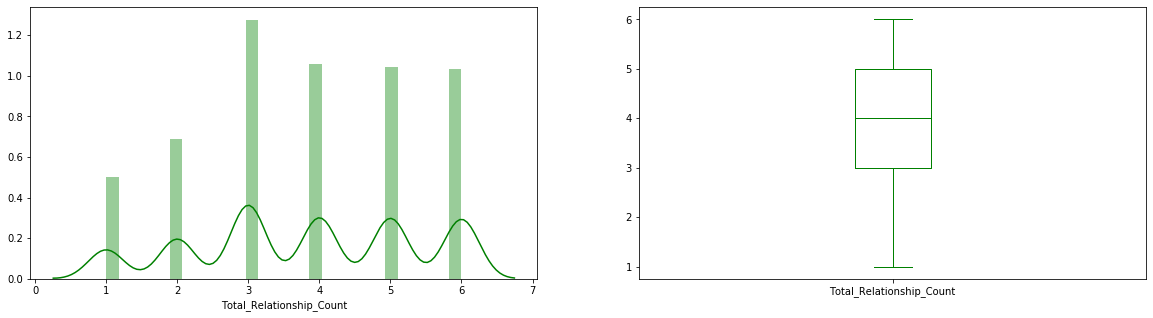

In [18]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Total_Relationship_Count'], label='Total_Relationship_Count', color="g")

plt.subplot(122)
dataset['Total_Relationship_Count'].plot(kind='box', label="Total_Relationship_Count", color="g")

This graph shows a very positive message. In this dataset it is greater the number of card owners who are in a possession of 3 or more bank product. This situation only confirmes the enormous importance of cross-selling, which, it semms, is a lesson learned by this bank. The more cross-selling is performed, the harder it would be for the clients to leave.

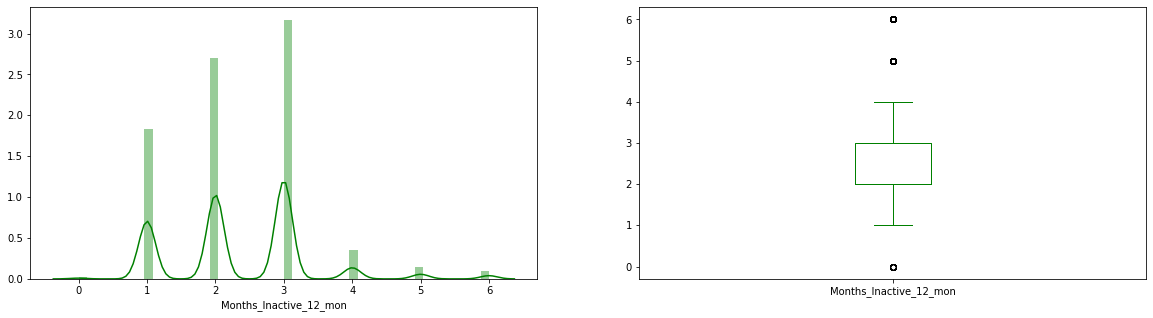

In [19]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Months_Inactive_12_mon'], label='Months_Inactive_12_mon', color="g")

plt.subplot(122)
dataset['Months_Inactive_12_mon'].plot(kind='box', label="Months_Inactive_12_mon", color="g")

The majority of card owners have 3 months on inactivity for the period of 1 year, after which are the group of card owners with 2 and 1 month of inactivity. This means that mostly, the customers are prone to spending their card limits and that the bank can probably whitness certain fall aggregated in one quarter of the year.

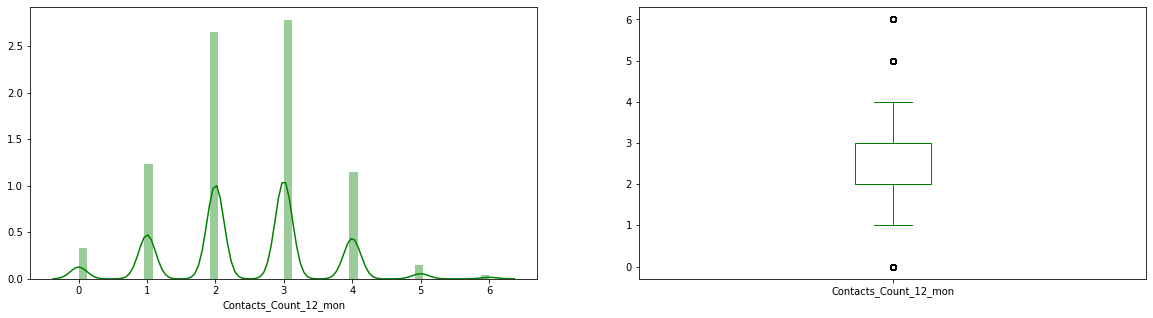

In [20]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Contacts_Count_12_mon'], label='Contacts_Count_12_mon', color="g")

plt.subplot(122)
dataset['Contacts_Count_12_mon'].plot(kind='box', label="Contacts_Count_12_mon", color="g")

Contribution to the bank in the form of bringing new contacts?

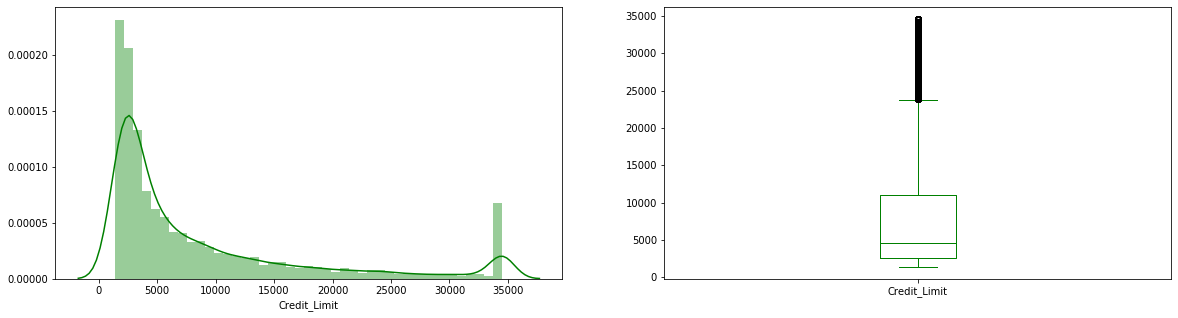

In [21]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Credit_Limit'], label='Credit_Limit', color="g")

plt.subplot(122)
dataset['Credit_Limit'].plot(kind='box', label="Credit_Limit", color="g")

This shows that credit limit variable has scewed distribution with most of the customers to have credit limit around 2000-3000. The dots above the upper line indicate outliers. Thus, there are many outliers on the upper side.

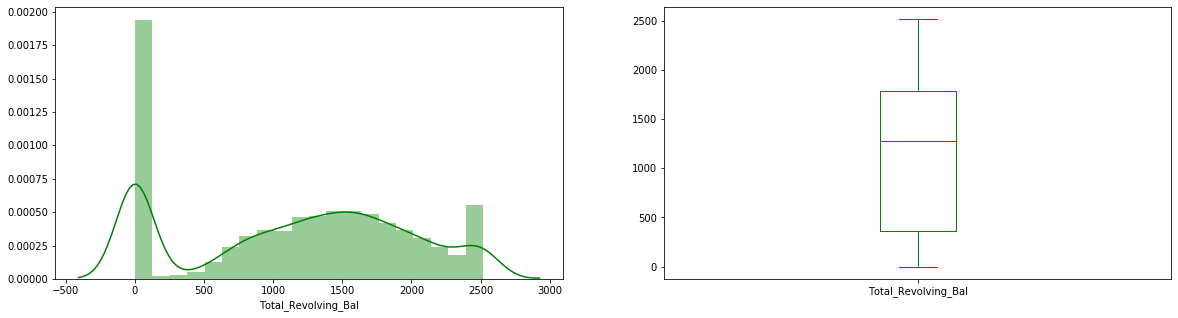

In [22]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Total_Revolving_Bal'], label='Total_Revolving_Bal', color="g")

plt.subplot(122)
dataset['Total_Revolving_Bal'].plot(kind='box', label="Total_Revolving_Bal", color="g")

Most of the customers have Total Revolving Balance zero. This data signifies that most of the clients are returning the spent amount very inconsistently. The conclusion would be that either this clients have a necessity for higher revolving limit or that they have credit cards from other banks which have priority when returnig the spent amount.

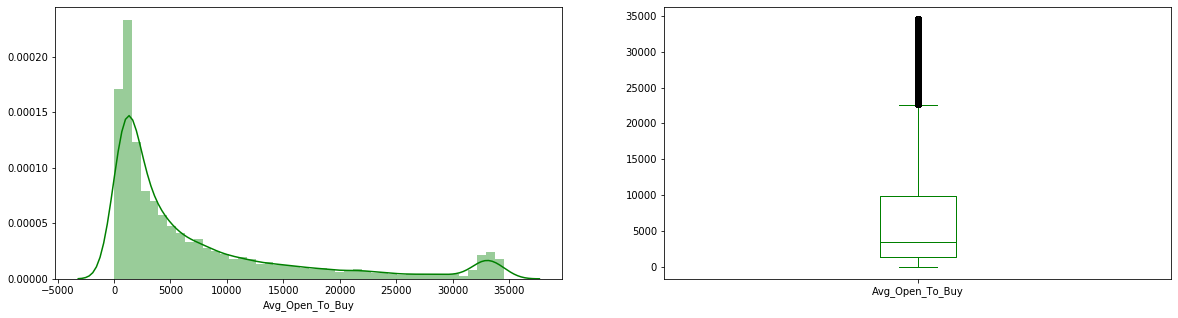

In [23]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Avg_Open_To_Buy'], label='Avg_Open_To_Buy', color="g")

plt.subplot(122)
dataset['Avg_Open_To_Buy'].plot(kind='box', label="Avg_Open_To_Buy", color="g")

This shows that Avg_open_to_buy variable has scewed distribution. The dots above the upper line indicate outliers. Thus, there are many outliers on the upper side.

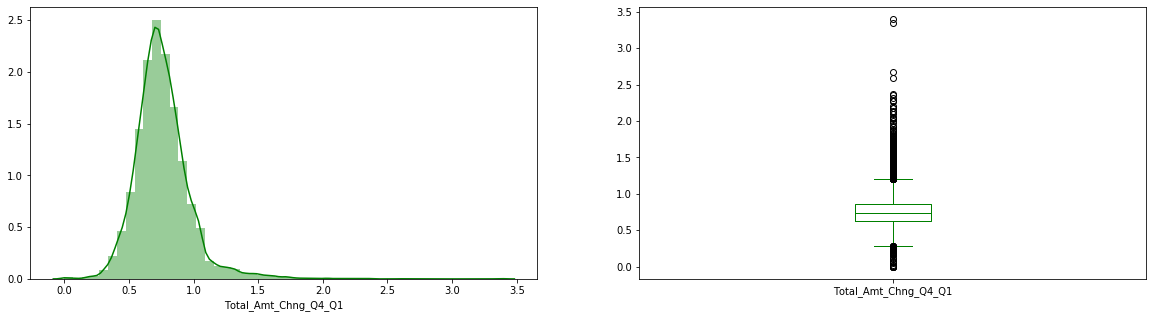

In [24]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Total_Amt_Chng_Q4_Q1'], label='Total_Amt_Chng_Q4_Q1', color="g")

plt.subplot(122)
dataset['Total_Amt_Chng_Q4_Q1'].plot(kind='box', label="Total_Amt_Chng_Q4_Q1", color="g")

Normal distribution of the feature signifying that the amount change in Q4 in comparison with Q1 is positive concluding that the sent amount rises as the year comes to its end.

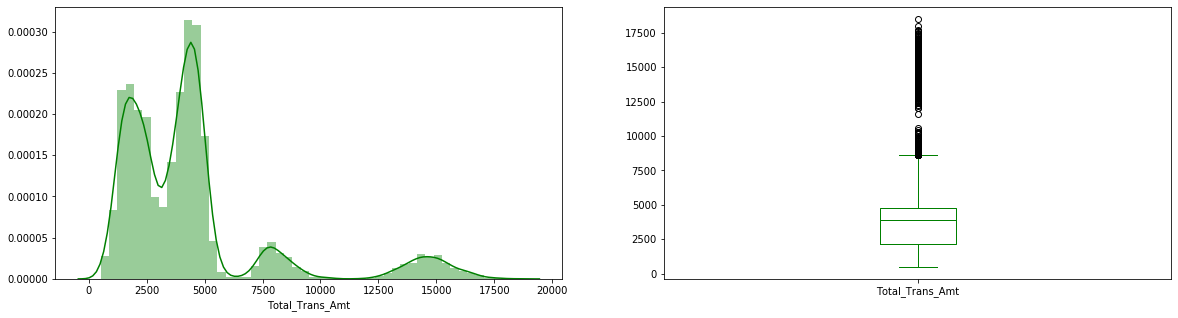

In [25]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Total_Trans_Amt'], label='Total_Trans_Amt', color="g")

plt.subplot(122)
dataset['Total_Trans_Amt'].plot(kind='box', label="Total_Trans_Amt", color="g")

The total transaction amount of the majority if the card owners is concentrated in the group 4.000 - 5.000. The graph shows a skeweness to the right, meaning that the greater annual total transaction amount is noticed with small gropus of clients.

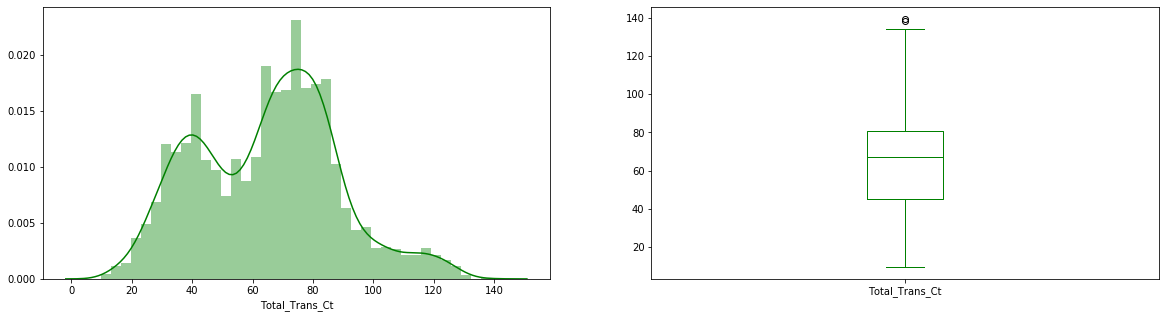

In [26]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Total_Trans_Ct'], label='Total_Trans_Ct', color="g")

plt.subplot(122)
dataset['Total_Trans_Ct'].plot(kind='box', label="Total_Trans_Ct", color="g")

The total annual count of transactions shows greater similarity to normal distribution, although, there is a small skeweness to the right. This means that majority of the clients have 70 - 80 transactions annualy, and above that, the number of clients starts diminishing. When compared to the previous graph, it can be concluded that paople would rather make more transactions but of a smaller cost, rather than making few big transactions.

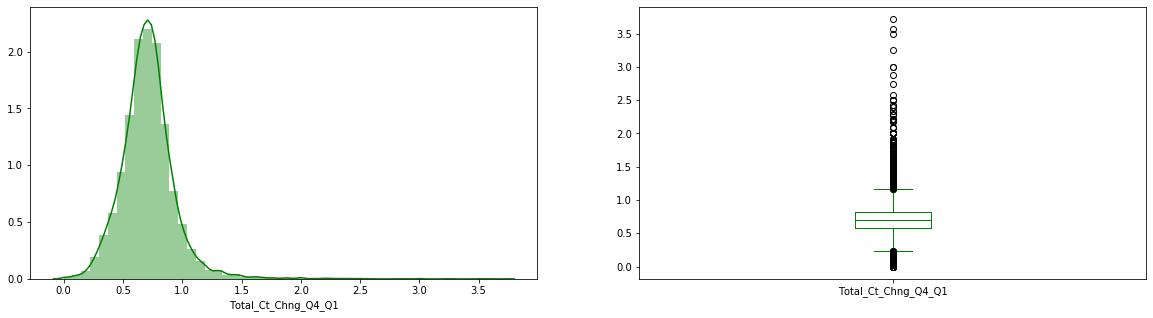

In [27]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Total_Ct_Chng_Q4_Q1'], label='Total_Ct_Chng_Q4_Q1', color="g")

plt.subplot(122)
dataset['Total_Ct_Chng_Q4_Q1'].plot(kind='box', label="Total_Ct_Chng_Q4_Q1", color="g")

Most of the clients do not make big changes when it comes to transaction count in Q4 compared to Q1. This means most of them are constantly spending the card for their usual quarterly needs. Very small group of clients make bigger changes in their number of transactions and this group of clients actualy represent he skeweness in the graph.

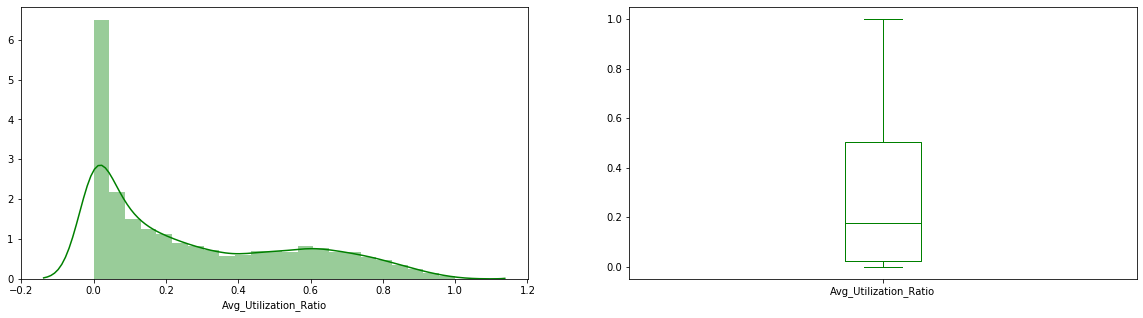

In [28]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Avg_Utilization_Ratio'], label='Avg_Utilization_Ratio', color="g")

plt.subplot(122)
dataset['Avg_Utilization_Ratio'].plot(kind='box', label="Avg_Utilization_Ratio", color="g")

This is a feature of a very big importance, because sometimes, the card owners who are not using their credit card bring more expenses to the bank, rather than income. This is the only graph were negative numbers are noted. Most of the clients have very low average utilisation ratio and as the ratio grows, the graph shows big slope downwards turning itself into skeweness to the right. This feaure perfectly explains the feature 'Total_Revolving_Bal', which mens that either the clients are not returning the spent amounts or they are not spending their cards at all. Average utilisation ratio finaly shows that the majority of the clients have a huge lack of card expenditure, which is a serious drawback. The bank needs to work intensively on stimulating the clients to spend and revovle their card limits. Otherwise, it can become unimportant to them wheter they are clients of the bank or not, and finaly, they could attrite from the bank. This explains why almost all of the features have skeweness to the right.

## Bivariate Analysis 

### Categorical features vs. class

In [29]:
dataset2 = pd.crosstab(dataset['Gender'],dataset['Attrition_Flag'])
dataset2

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,930,4428
M,697,4072


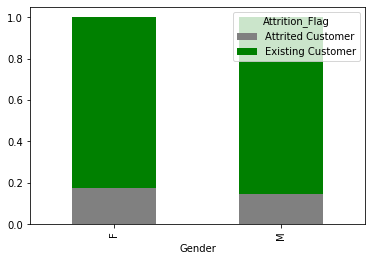

In [30]:
dataset2.div(dataset2.sum(axis=1), axis=0).plot(kind="bar", stacked=True, color=['gray','g'])

There is a good balance of clients by gender with no distinction between these two groups.

In [31]:
dataset3 = pd.crosstab(dataset['Education_Level'],dataset['Attrition_Flag'])
dataset3

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,154,859
Doctorate,95,356
Graduate,487,2641
High School,306,1707
Post-Graduate,92,424
Uneducated,237,1250
Unknown,256,1263


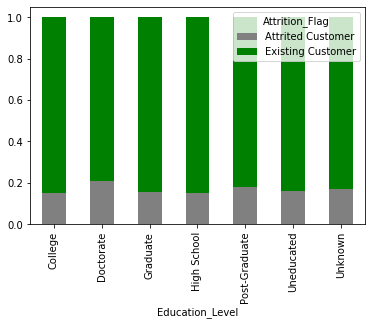

In [32]:
dataset3.div(dataset3.sum(axis=1), axis=0).plot(kind="bar", color=['gray','g'], stacked=True)

The clients form the 'Doctorate' category have the greatest probability to leave. These clients are probably seeking for different ways to spend their money, so the bank must be creative and find ways ho to be interesting to them.

In [33]:
dataset4 = pd.crosstab(dataset['Marital_Status'],dataset['Attrition_Flag'])
dataset4

Attrition_Flag,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,121,627
Married,709,3978
Single,668,3275
Unknown,129,620


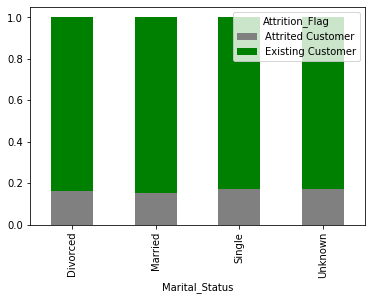

In [34]:
dataset4.div(dataset4.sum(axis=1), axis=0).plot(kind="bar", color=['gray','g'], stacked=True)

This feature has no significant impact on the client attrition.

In [35]:
dataset5 = pd.crosstab(dataset['Income_Category'],dataset['Attrition_Flag'])
dataset5

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,126,601
$40K - $60K,271,1519
$60K - $80K,189,1213
$80K - $120K,242,1293
Less than $40K,612,2949
Unknown,187,925


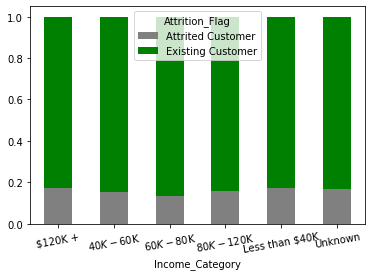

In [36]:
dataset5.div(dataset5.sum(axis=1), axis=0).plot(kind="bar",  color=['gray','g'] , stacked=True)

plt.xticks(rotation = 10)
plt.show()

Clients belonging on the two sides of income category are more likely to leave.

In [37]:
dataset6 = pd.crosstab(dataset['Card_Category'],dataset['Attrition_Flag'])
dataset6

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,1519,7917
Gold,21,95
Platinum,5,15
Silver,82,473


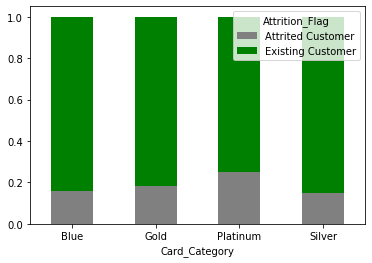

In [38]:
dataset6.div(dataset6.sum(axis=1), axis=0).plot(kind="bar", color=['gray','g'], stacked=True)

plt.xticks(rotation = 360)
plt.show()

Clients with platinum cards are most likely to leave. Compared to the representation of each of the cards in the bank, the Platinum card is the least used card in the bank, and the most used card is Blue. Te reason for this trend can probably be connected with the height of clients' incomes, as it can be seen from one of the previous graphs that also clients with more that 120.000 usd incomes are more likely to leave the bank. In conclusion, the Platinum card is a type of card aimed for the highest social classes, which are probably trying to find ways to spend their high incomes. This makes this group wothed observing and stopping from trying another bank's card.

### Numeric features vs. class

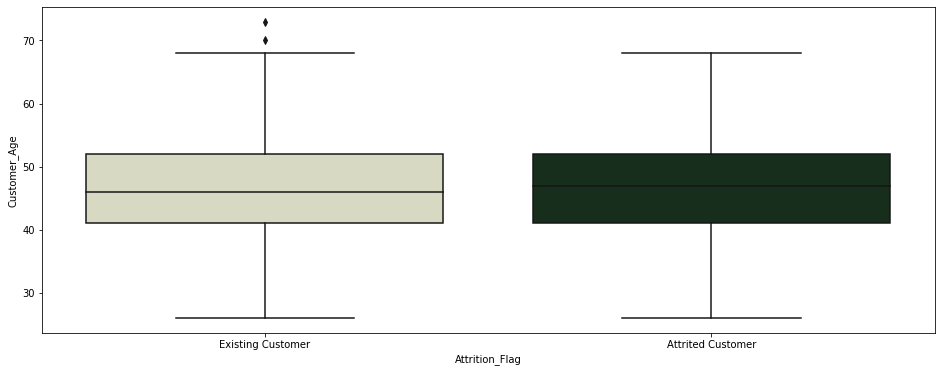

In [39]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=dataset, x="Attrition_Flag", y="Customer_Age", palette="ch:s=8.12,rot=-0.25")
plt.show()

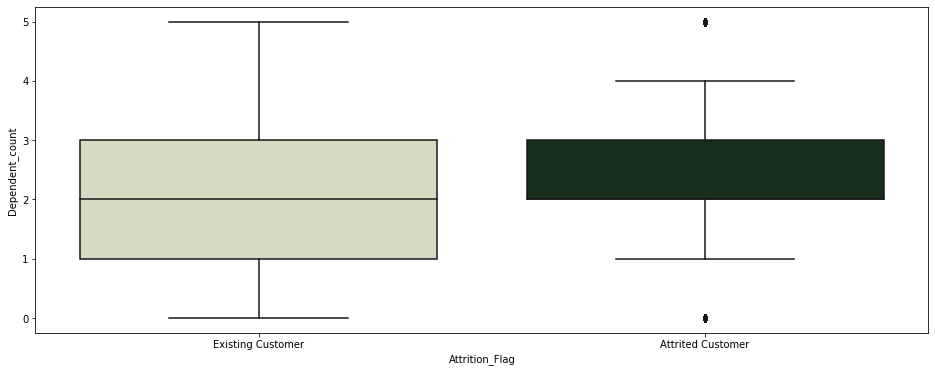

In [40]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=dataset, x="Attrition_Flag", y="Dependent_count", palette="ch:s=8.12,rot=-0.25")
plt.show()

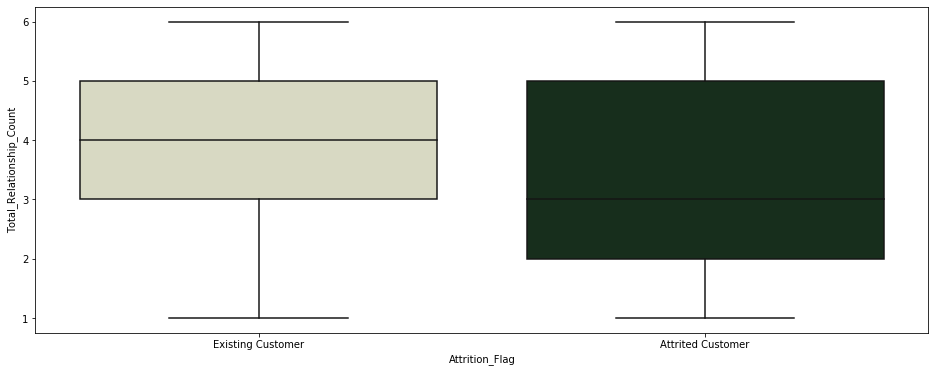

In [41]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=dataset, x="Attrition_Flag", y="Total_Relationship_Count", palette="ch:s=8.12,rot=-0.25")
plt.show()

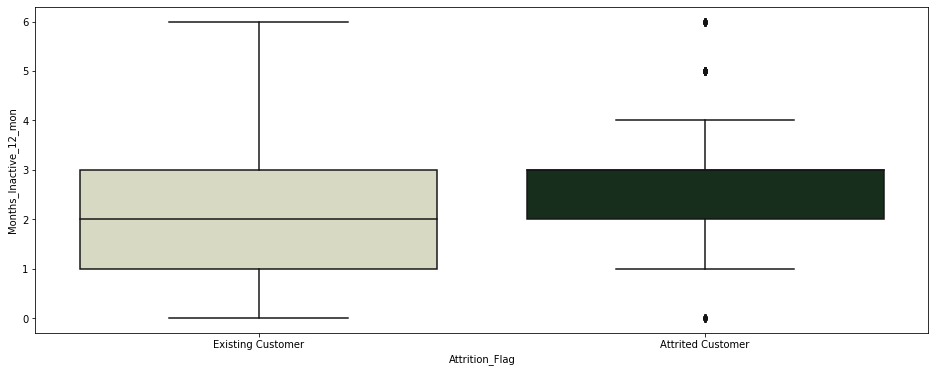

In [42]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=dataset, x="Attrition_Flag", y="Months_Inactive_12_mon", palette="ch:s=8.12,rot=-0.25")
plt.show()

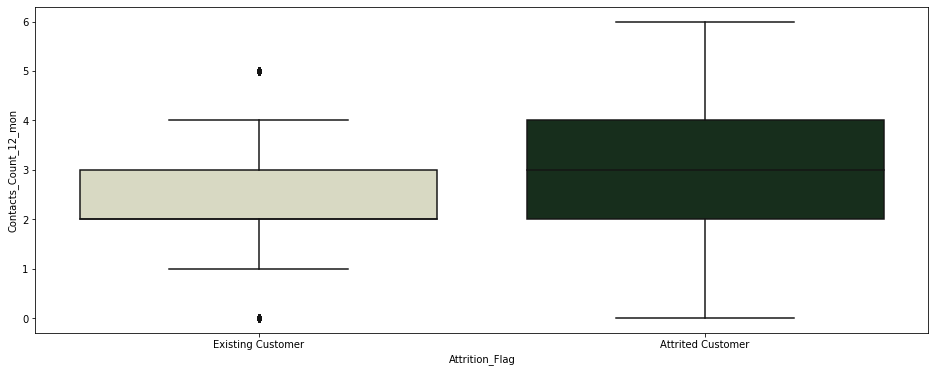

In [43]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=dataset, x="Attrition_Flag", y="Contacts_Count_12_mon", palette="ch:s=8.12,rot=-0.25")
plt.show()

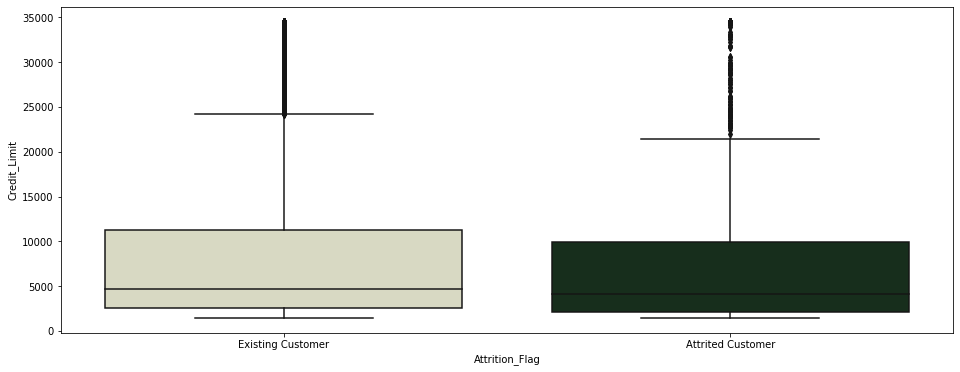

In [44]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=dataset, x="Attrition_Flag", y="Credit_Limit", palette="ch:s=8.12,rot=-0.25")
plt.show()

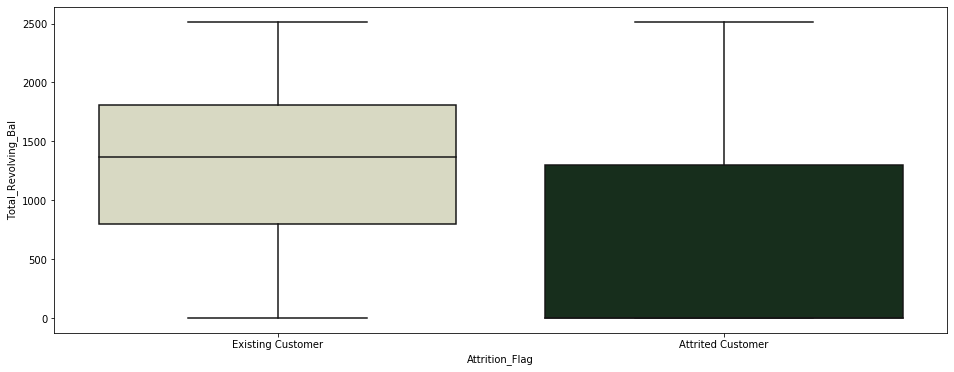

In [45]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=dataset, x="Attrition_Flag", y="Total_Revolving_Bal", palette="ch:s=8.12,rot=-0.25")
plt.show()

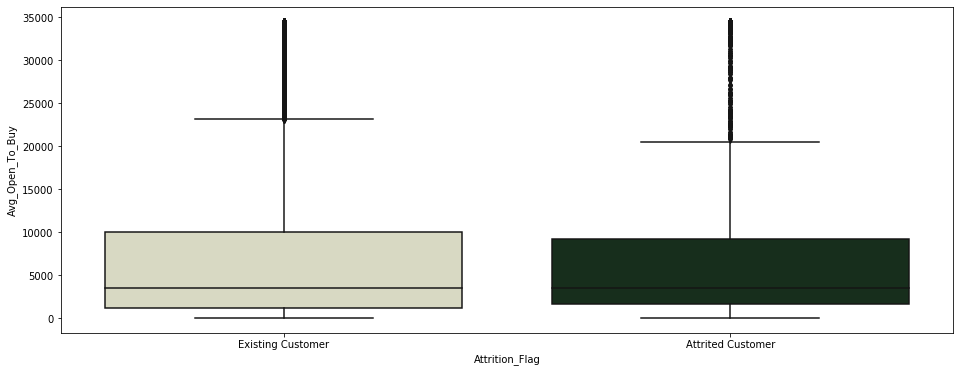

In [46]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=dataset, x="Attrition_Flag", y="Avg_Open_To_Buy", palette="ch:s=8.12,rot=-0.25")
plt.show()

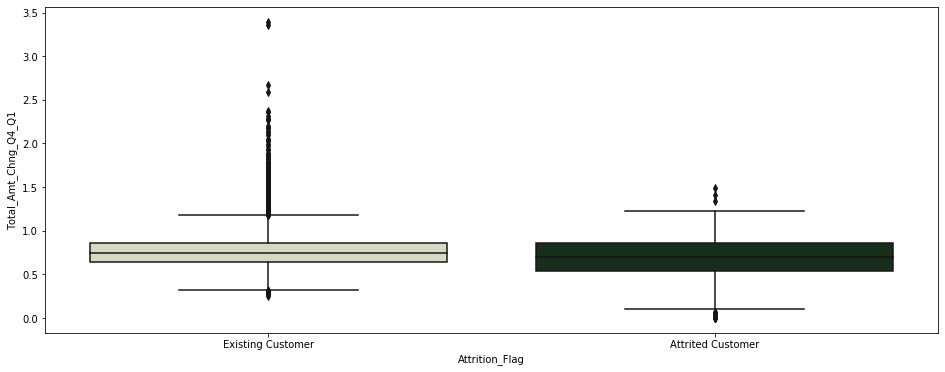

In [47]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=dataset, x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", palette="ch:s=8.12,rot=-0.25")
plt.show()

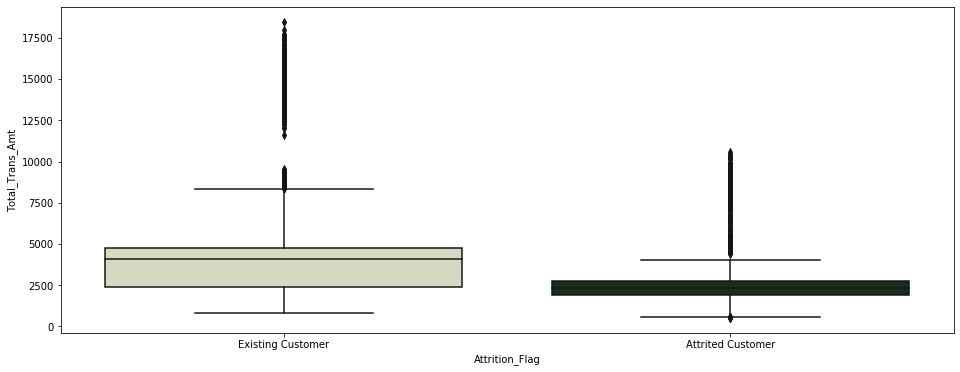

In [48]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=dataset, x="Attrition_Flag", y="Total_Trans_Amt", palette="ch:s=8.12,rot=-0.25")
plt.show()

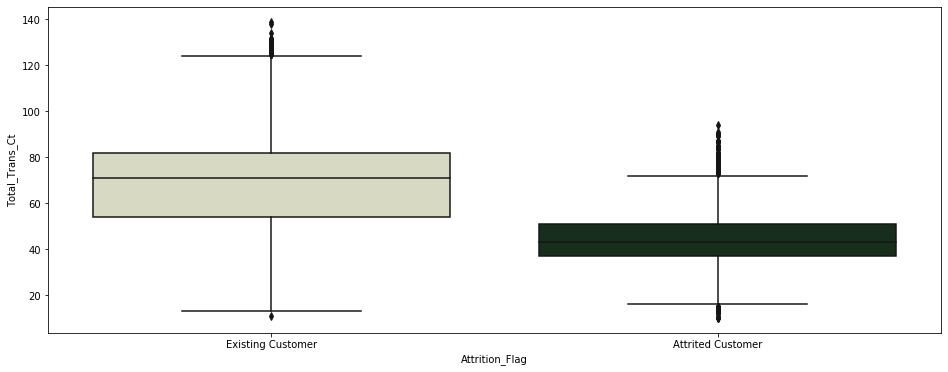

In [49]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=dataset, x="Attrition_Flag", y="Total_Trans_Ct", palette="ch:s=8.12,rot=-0.25")
plt.show()

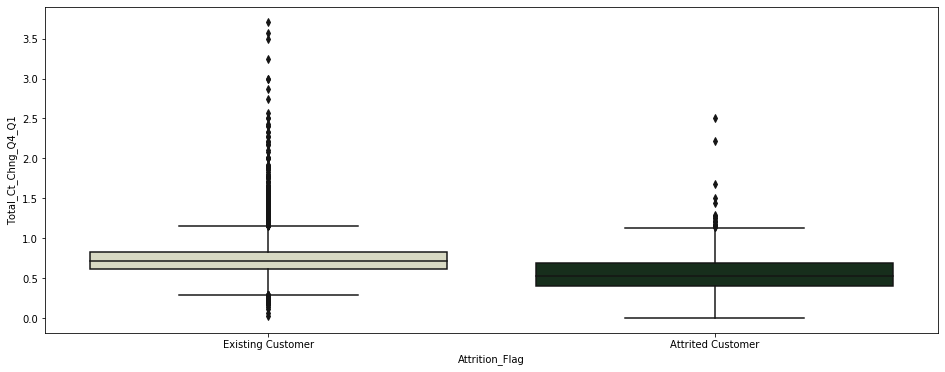

In [50]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=dataset, x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", palette="ch:s=8.12,rot=-0.25")
plt.show()

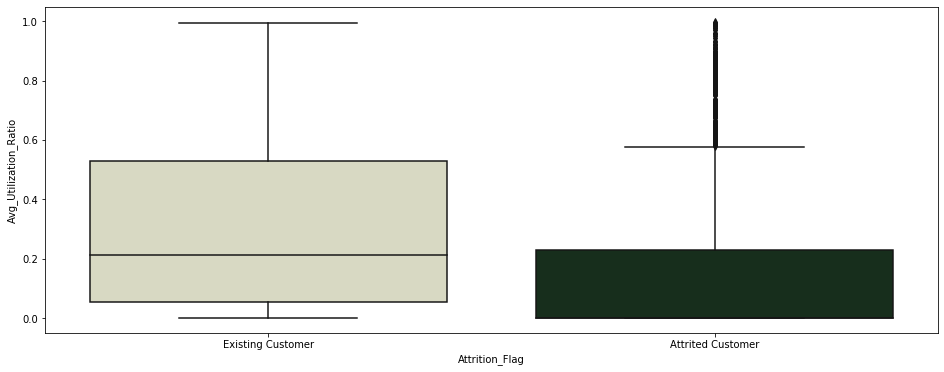

In [51]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=dataset, x="Attrition_Flag", y="Avg_Utilization_Ratio", palette="ch:s=8.12,rot=-0.25")
plt.show()

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

def countplot(label, dataset, palette):
  plt.figure(figsize=(15,10))
  Y = dataset[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, palette="ch:s=8.12,rot=-0.25")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [53]:
%matplotlib inline

def countplot_withY(label, dataset, palette):
  plt.figure(figsize=(20,10))
  Y = dataset[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="Attrition_Flag", palette="ch:s=8.12,rot=-0.25")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

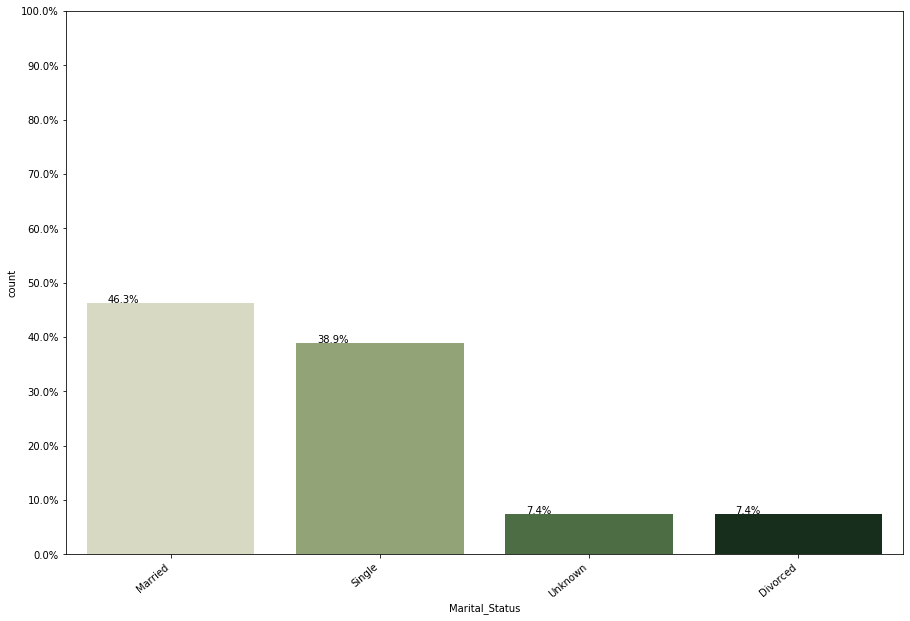

In [54]:
countplot("Marital_Status", dataset, palette="ch:s=8.12,rot=-0.25")

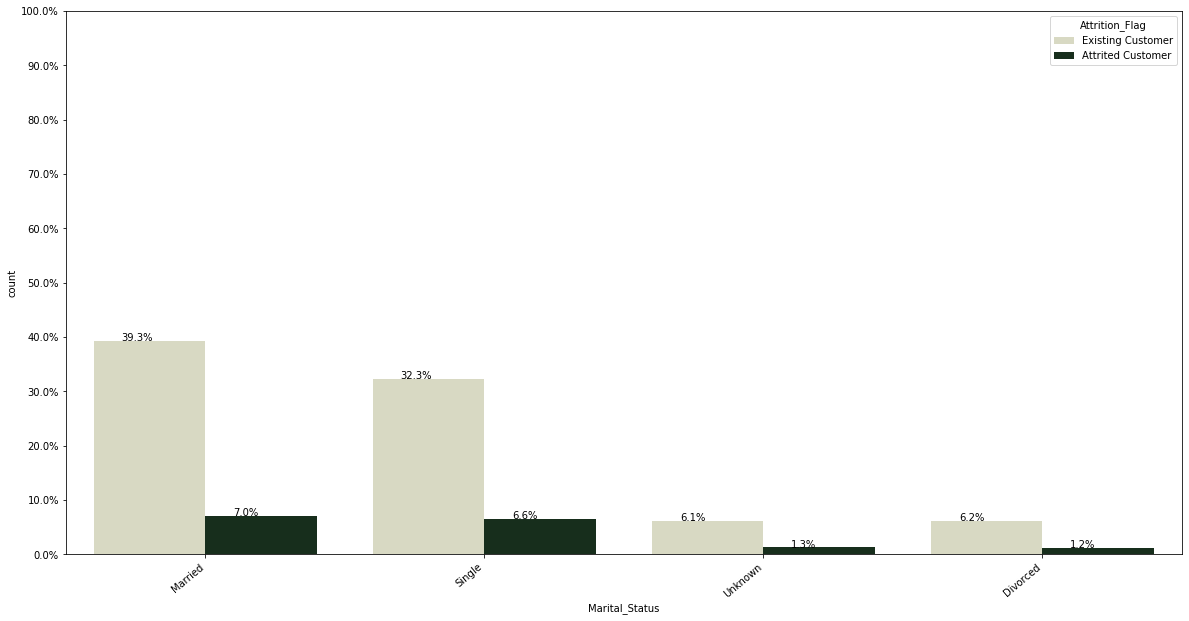

In [55]:
countplot_withY("Marital_Status", dataset, palette="ch:s=8.12,rot=-0.25")

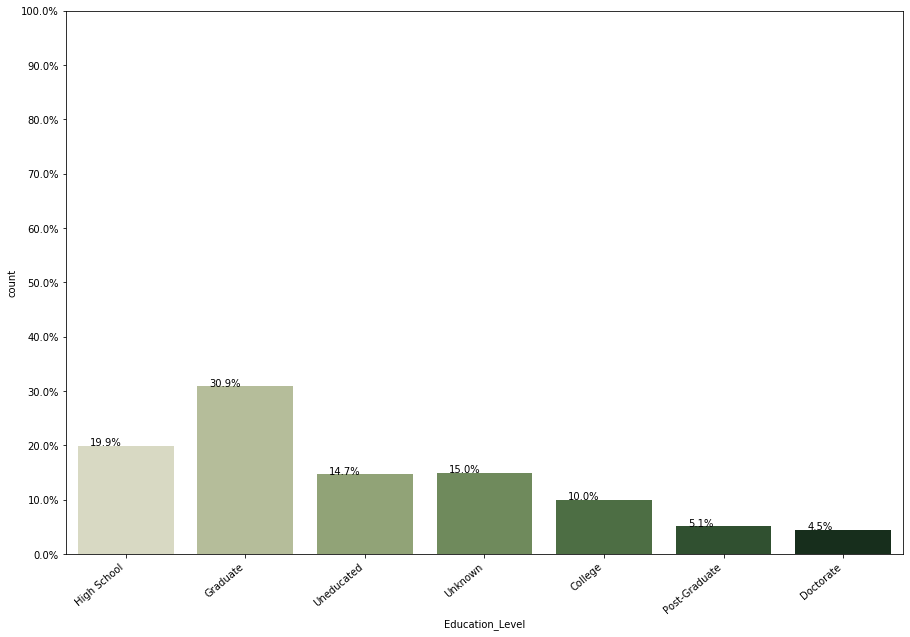

In [56]:
countplot("Education_Level", dataset, palette="ch:s=8.12,rot=-0.25")

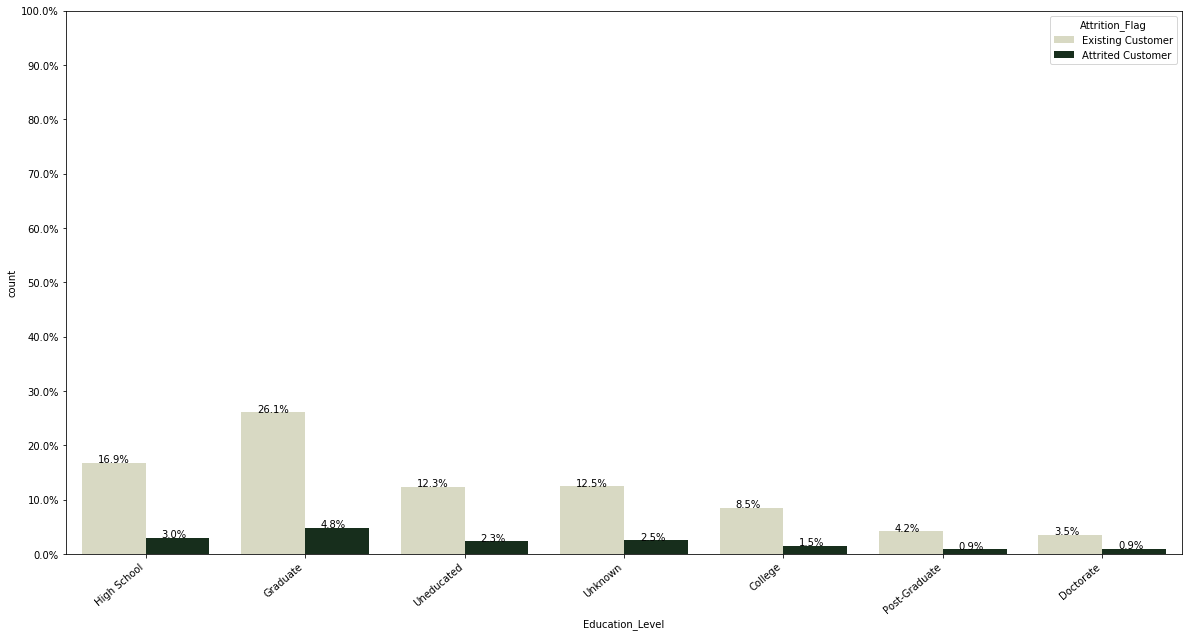

In [57]:
countplot_withY("Education_Level", dataset, palette="ch:s=8.12,rot=-0.25")

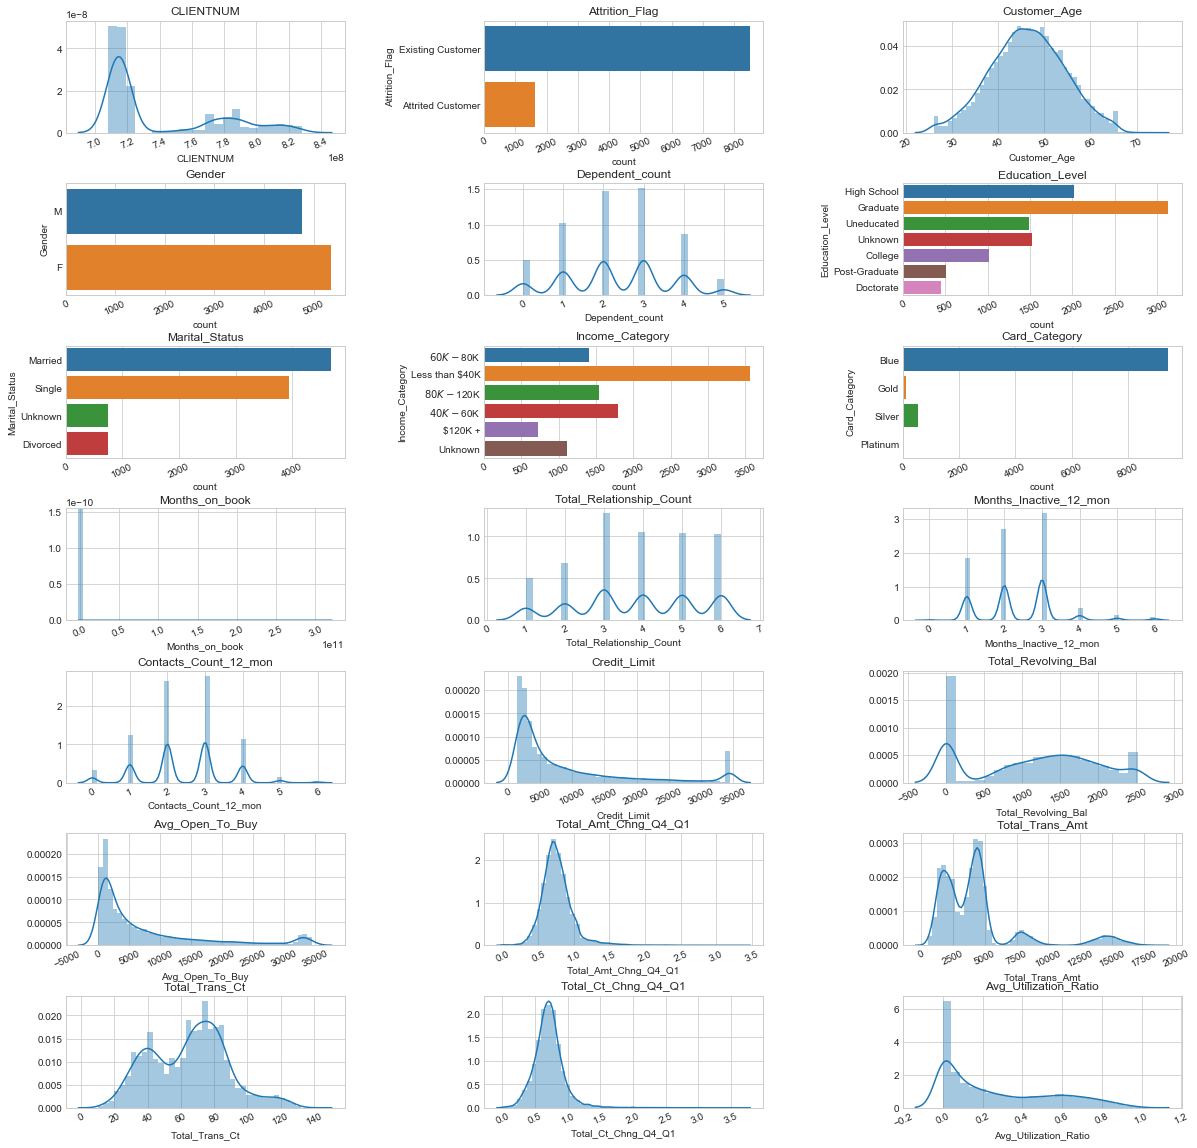

In [58]:
import math
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            try:
                g = sns.distplot(dataset[column])
                plt.xticks(rotation=25)
            except RuntimeError as re:
                if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
                    sns.distplot(dataset[column], kde_kws={'bw': 0.1})
                else:
                    raise re
    
plot_distribution(dataset, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

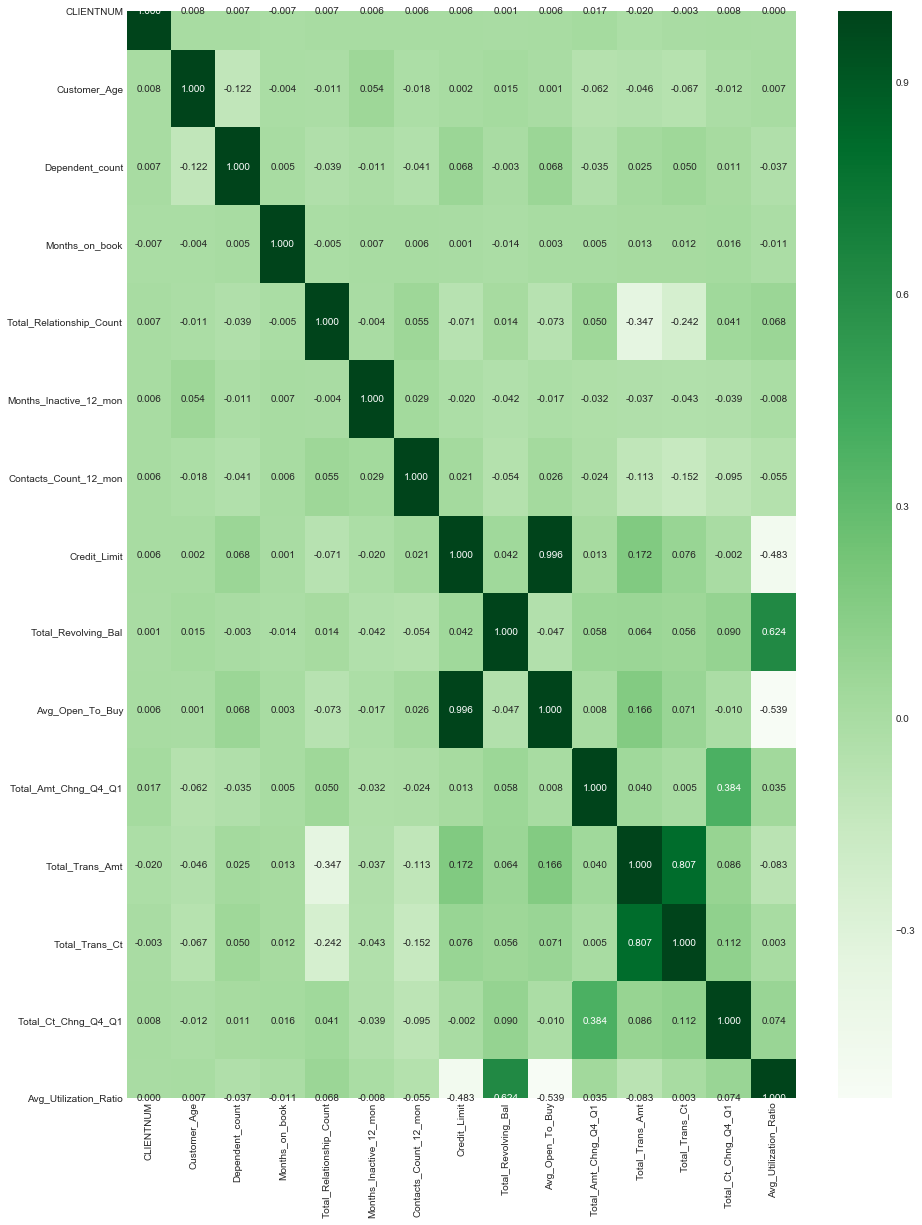

In [77]:
X = dataset.drop(['Attrition_Flag'], axis=1)
y = dataset['Attrition_Flag']

result = pd.concat([X, y], axis=1)
correlation_train=result.corr()
plt.figure(figsize=(15, 20))
sns.heatmap(correlation_train, annot=True, fmt='.3f', cmap="Greens")
plt.show()

## 7. Discussion, Concusions, Future improvements
- which features are the most important
- how will you explain the model to the management of the bank
- how much benefit/improvement should the bank expect